## Approximating $\pi$ using coin flips

Link for the code: https://github.com/berkidem/pi_from_coins/blob/main/pi_from_coin_flips.ipynb

How can we approximate the value of $\pi$ using coin tosses? We can use the following method:

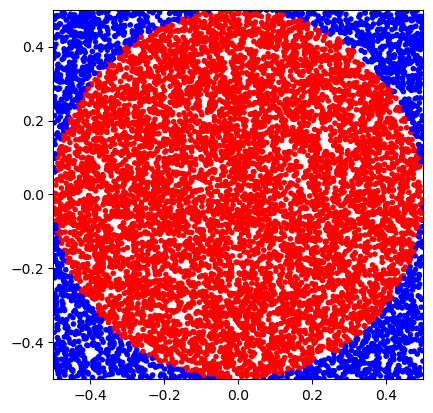

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating a random number between 0 and 1 using coin tosses
def rand_num(k):
    coin_flips = np.random.randint(2, size=k)
    bin_str = "".join(str(flip) for flip in coin_flips)
    num = int(bin_str, 2)/(2**k -1)
    return num

In [3]:
# generating a random sequence of n numbers between 0 and 1
def rand_seq(n, k):
    seq = [rand_num(k) for i in range(n)]
    return seq

In [5]:
# generating a random sequence of n points in the unit square
def points(n, k):
    x = rand_seq(n, k)
    y = rand_seq(n, k)
    points = np.column_stack((x, y))
    center = np.array([0.5, 0.5])
    points =  points - center
    return points

In [6]:
# estimating pi from n points in the unit square
def pi_from_coin_flips(n, k, plot = True):

    pts = points(n, k)
    dists = np.sqrt(np.sum(pts**2, axis=1))
    in_circle = np.sum(dists <= 0.5)
    ratio = in_circle/n
    approx_pi = 4*ratio

    # plot the points   
    if plot == True:
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        ax.set_xlim(-0.5, 0.5)
        ax.set_ylim(-0.5, 0.5)
        ax.scatter(pts[:,0], pts[:,1], c=dists <= 0.5, cmap='bwr', marker = '.')
        plt.show()

    return approx_pi

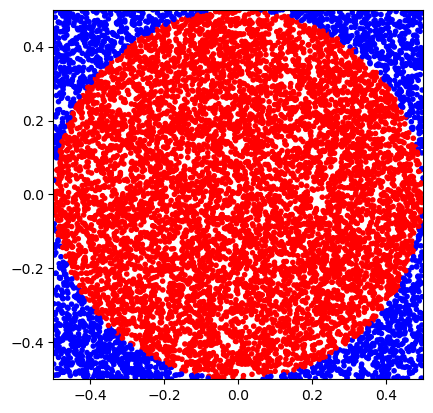

3.1288

In [7]:
pi_from_coin_flips(10000, 20)

In [8]:
# running the experiment m times and averaging the results
def average_pi(n, k, m, plot = False):
    return np.mean([pi_from_coin_flips(n, k, plot) for i in range(m)])

In [10]:
for i in range(1, 5):
    for j in range(1, 5):
        print(f"With {10**i} points and {10**j} runs, the approximation is {average_pi(10**i, 10, 10**j, plot = False)}")

With 10 points and 10 runs, the approximation is 3.3600000000000003
With 10 points and 100 runs, the approximation is 3.2200000000000006
With 10 points and 1000 runs, the approximation is 3.1068000000000002
With 10 points and 10000 runs, the approximation is 3.1264800000000004
With 100 points and 10 runs, the approximation is 3.1639999999999997
With 100 points and 100 runs, the approximation is 3.1392
With 100 points and 1000 runs, the approximation is 3.13404
With 100 points and 10000 runs, the approximation is 3.132904
With 1000 points and 10 runs, the approximation is 3.1052000000000004
With 1000 points and 100 runs, the approximation is 3.1305600000000005
With 1000 points and 1000 runs, the approximation is 3.13656
With 1000 points and 10000 runs, the approximation is 3.1353824000000006
With 10000 points and 10 runs, the approximation is 3.13076
With 10000 points and 100 runs, the approximation is 3.1372839999999997
With 10000 points and 1000 runs, the approximation is 3.1351435999

#### Faster way to get a sequence of ("uniformly") random numbers

In [4]:
# generating a random sequence of n numbers between 0 and 1
def faster_rand_seq(n, k):
    coin_flips = np.random.randint(2, size=(n, k))
    powers = np.arange(k - 1, -1, -1)
    powers = 2**powers
    nums = coin_flips.dot(powers)
    nums_norm = nums/(2**k -1)
    return nums_norm

### Pi from Uniform Random Numbers

In [ ]:
# pi from uniform random variables
def pi_from_uniform(n):
    x = np.random.uniform(size=n)
    y = np.random.uniform(size=n)
    pts = np.column_stack((x, y))
    dists = np.sqrt(np.sum(pts**2, axis=1))
    in_circle = np.sum(dists <= 1)
    return 4*in_circle/n

In [ ]:
# estimate pi from n points in the unit square, generated using uniform random variables
pi_from_uniform(10000000)